In [10]:
import numpy as np
import scipy.interpolate as interp
import scipy.optimize as opt
import matplotlib.pyplot as plt
import tabulate as tab

In [3]:
# Runge-Kutta Order 4 in a system of m differential equations
def RK4(F,T,y0,n,N_int,m):
    # Setup timesteps
    [t,h] = np.linspace(0,T,n,retstep=True)
    u = np.zeros([m,n]); u[:,0] = y0 # solution at timesteps

    # Run Runge-Kutta
    for k in range(n-1):
        K1 = F(t[k],u[:,k]); K2 = F(t[k]+h/2,u[:,k]+h/2*K1)
        K3 = F(t[k]+h/2,u[:,k]+h/2*K2); K4 = F(t[k]+h,u[:,k]+h*K3)

        u[:,k+1] = u[:,k]+h/6*(K1+2*K2+2*K3+K4)

    # Interpolate
    X = np.linspace(0,T,N_int); Y = np.zeros([m,N_int])
    Y[0,:] = interp.interp1d(t,u[0,:],kind='cubic')(X)
    for j in range(1,m):
        Y[j,:] = interp.interp1d(t,u[1,:],kind='cubic')(X)

    return Y

In [550]:
# Crank-Nicholson
def CN(F,T,y0,n,N_int,m):
    # Setup timesteps
    [t,h] = np.linspace(0,T,n,retstep=True)
    u = np.zeros([m,n]); u[:,0] = y0 # solution at timesteps

    # Run Crank-Nicholson with Dekker-Brent rootfinding
    for k in range(n-1):
        for j in range(m):
            fj = lambda x: x-u[:,k]-h/2*(F(t[k],u[:,k])[j]+F(t[k+1],x))
            u[:,k+1] = opt.brentq(fj,u[:,k]/2,2*u[:,k])

    # Interpolate
    X = np.linspace(0,T,N_int); Y = np.zeros([m,N_int])
    Y[0,:] = interp.interp1d(t,u[0,:],kind='cubic')(X)
    for j in range(1,m):
        Y[j,:] = interp.interp1d(t,u[1,:],kind='cubic')(X)

    return Y

In [23]:
# Adams-Bashforth method of order two in a system of m differential equations
def AB2(F,T,y0,n,N_int,m):
    # Setup timesteps
    [t,h] = np.linspace(0,T,n,retstep=True)
    u = np.zeros([m,n]); u[:,0] = y0 # solution at timesteps
    
    # # Obtain 2nd initial value for AB2 using RK4
    # K1 = F(t[0],u[:,0]); K2 = F(t[0]+h/2,u[:,0]+h/2*K1);
    # K3 = F(t[0]+h/2,u[:,0]+h/2*K2); K4 = F(t[0]+h,u[:,0]+h*K3)
    # u[:,1] = u[:,0] + h/6*(K1+K2+K3+K4)

    # Obtain 2nd initial value for AB2 using Forward Euler
    u[:,1] = u[:,0] + h*F(t[0],u[:,0])

    # Run 2nd order Adams-Bashforth
    for k in range(2,n):
        u[:,k] = u[:,k-1] + h/2*(3*F(t[k-1],u[:,k-1])-F(t[k-2],u[:,k-2]))

    # Interpolate
    X = np.linspace(0,T,N_int); Y = np.zeros([m,N_int])
    Y[0,:] = interp.interp1d(t,u[0,:],kind='cubic')(X)
    for j in range(1,m):
        Y[j,:] = interp.interp1d(t,u[1,:],kind='cubic')(X)

    return Y

In [395]:
# Test RK4 on the Cauchy test problem with initial value 1 and lambda = 1
F = lambda t,x: x

n = 1000; N_int = 100000
yh = RK4(F,1,1,n,N_int,1)
X = np.linspace(0,1,N_int)

err = max(abs(yh[0]-np.exp(X)))
print(err)

5.5067062021407764e-14


In [551]:
# Test CN on the Cauchy test problem with initial value 1 and lambda = 1
F = lambda t,x: x

n = 1000; N_int = 100000
yh = CN(F,1,1,n,N_int,1)
X = np.linspace(0,1,N_int)

err = max(abs(yh[0]-np.exp(X)))
print(err)

2.2697726631548676e-07


In [552]:
# Test AB2 on the Cauchy test problem with initial value 1 and lambda = 1
F = lambda t,x: x

n = 1000; N_int = 100000
yh = AB2(F,1,1,n,N_int,1)
X = np.linspace(0,1,N_int)

err = max(abs(yh[0]-np.exp(X)))
print(err)

2.494701969890656e-06


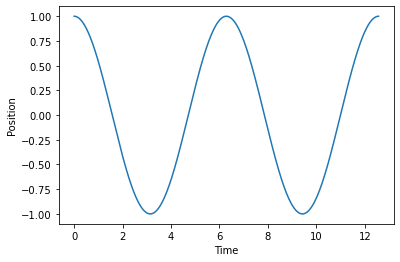

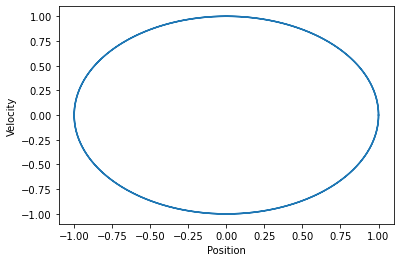

2.4252884316927625e-05


In [7]:
# Test RK4 on the homogeneous helmholtz equation
F = lambda t,x: np.matmul(np.array([[0,1],[-1,0]]),x)

n = 100; N_int = 100000
yh = RK4(F,4*np.pi,[1,0],n,N_int,2)
X = np.linspace(0,4*np.pi,N_int)

plt.figure(1)
plt.plot(X,yh[0])
plt.ylabel('Position')
plt.xlabel('Time')
plt.show()

plt.figure(2)
plt.plot(yh[0],yh[1])
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.show()

err = max(abs(yh[0]-np.cos(X)))
print(err)

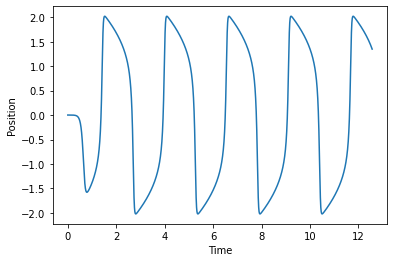

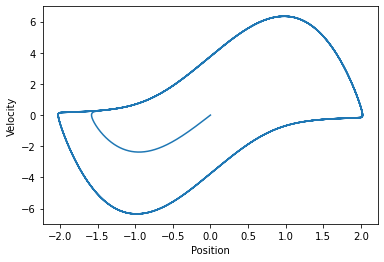

╒═══════════════╤════════════════╕
│   # Timesteps │   Order of Cvg │
╞═══════════════╪════════════════╡
│           400 │       nan      │
├───────────────┼────────────────┤
│           800 │       nan      │
├───────────────┼────────────────┤
│          1600 │        14.4532 │
├───────────────┼────────────────┤
│          3200 │        13.3514 │
├───────────────┼────────────────┤
│          6400 │        14.8286 │
├───────────────┼────────────────┤
│         12800 │        15.4704 │
├───────────────┼────────────────┤
│         25600 │        15.756  │
├───────────────┼────────────────┤
│         51200 │        15.8852 │
├───────────────┼────────────────┤
│        102400 │        15.9475 │
├───────────────┼────────────────┤
│        204800 │        15.9164 │
╘═══════════════╧════════════════╛


In [27]:
# Test RK4 on the Van der Pol oscillator
def F(t,x):
    return np.array([x[1],4*x[1]*(1-x[0]**2)-x[0]])

n = 1000; N_int = 100000
yh = RK4(F,50,[10**-3,0],n,N_int,2)
X = np.linspace(0,4*np.pi,N_int)

plt.figure(1)
plt.plot(X,yh[0])
plt.ylabel('Position')
plt.xlabel('Time')
plt.show()

plt.figure(2)
plt.plot(yh[0],yh[1])
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.show()

def error(M,F,T,y0,k,N_int,m):
    X = np.linspace(0,T,N_int)
    N = np.zeros(k,dtype=np.int64)
    U = np.zeros([k,N_int])

    for j in range(k):
        N[j] = 100*2**(j+2)
        U[j,:] = M(F,T,y0,N[j],N_int,m)[0]
    
    Err = np.zeros(k)
    Err[0] = float('NaN'); Err[1] = float('NaN')
    for j in range(k-2):
        Err[j+2] = max(U[j+1,:]-U[j,:])/max(U[j+2,:]-U[j+1,:])

    return N,Err

n_ref = 10
N,Err = error(RK4,F,50,[10**-3,0],n_ref,N_int,2)

data = [['# Timesteps','Order of Cvg']] + [[N[j],Err[j]] for j in range(n_ref)]
table = tab.tabulate(data,headers='firstrow',tablefmt='fancy_grid')
print(table)